In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import f1_score
import numpy as np
from tqdm.notebook import tqdm
import json
import scipy
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms as transforms

In [98]:
negs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/3888FinetuneAdam/TestNeg.csv')
pos = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/3888FinetuneAdam/TestPos.csv')

In [99]:
pos

,Positive
0,0.044516
1,0.756676
2,0.999954
3,0.005206
4,1.000000
...,...
195,0.999581
196,0.216592
197,0.009275
198,0.154566


In [100]:
negs['Label'] = 0
pos['Label'] = 1
negs['Positive'] = negs['Negative']

In [101]:
y = pd.concat([negs,pos])
y = y.drop(['Negative'],axis=1)

In [102]:
y.head()

,Label,Positive
0,0,0.005583
1,0,0.034823
2,0,0.007522
3,0,0.005957
4,0,0.004809


In [103]:
y.groupby('Label').mean()

,Positive
Label,
0,0.019779
1,0.595963


# Plot the two distributions

<Axes: xlabel='Positive', ylabel='Percent'>

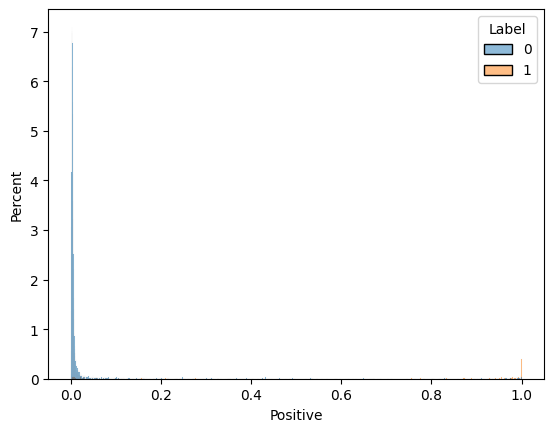

In [104]:
fig,ax = plt.subplots(1,1)
sns.histplot(y,x = 'Positive',hue='Label', stat = 'percent',ax = ax)
#ax.set_yscale('log')
#ax.set_xscale('log')

<Axes: xlabel='Positive', ylabel='Percent'>

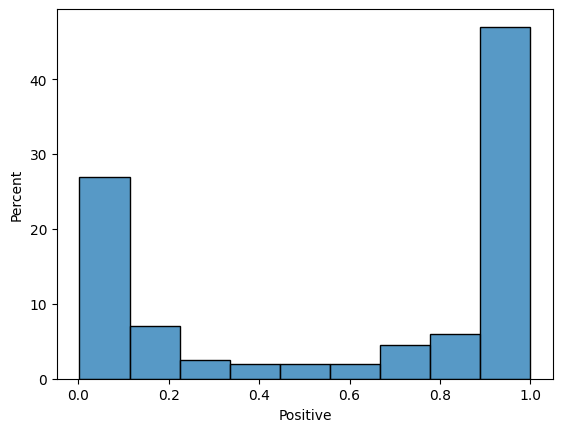

In [105]:
sns.histplot(data = y[y['Label']!= 0],x = 'Positive', stat = 'percent')

In [106]:
y.groupby('Label').mean()

,Positive
Label,
0,0.019779
1,0.595963


# Look at the precission recall curve

In [107]:
precision, recall, thresholds= precision_recall_curve(y['Label'],y['Positive'])

(0.0, 1.0)

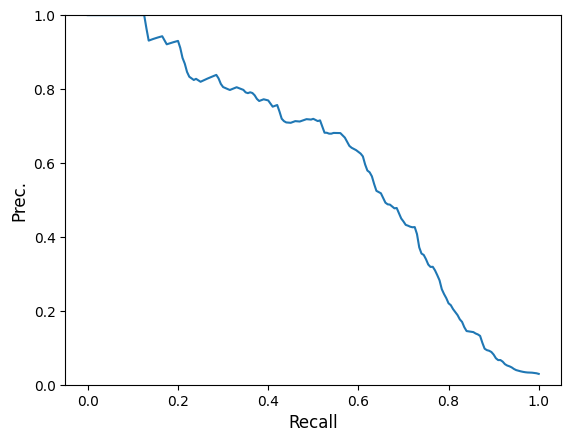

In [108]:
fig2,ax2 = plt.subplots(1)
sns.lineplot(x = recall, y = precision,ax = ax2,errorbar=None)
ax2.set_xlabel('Recall', fontsize = 12) # x-axis label with fontsize 15
ax2.set_ylabel('Prec.', fontsize = 12) # x-axis label with fontsize 15
ax2.set_ylim([0, 1])

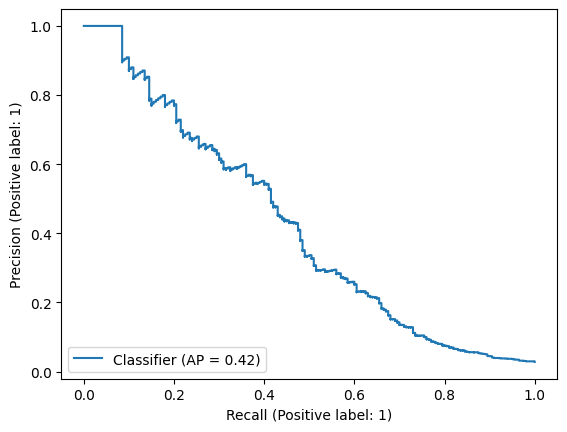

In [14]:
PrecisionRecallDisplay.from_predictions(y['Label'],y['Positive'])

In [58]:
def find_optimal_threshold(precisions, recalls, thresholds):
    """
    Given a list of precisions, recalls, and corresponding thresholds, finds the optimal threshold
    that maximizes the F1 score (harmonic mean of precision and recall).

    Args:
    - precisions (list): A list of precisions.
    - recalls (list): A list of recalls.
    - thresholds (list): A list of thresholds corresponding to the precisions and recalls.

    Returns:
    - The optimal threshold (float).
    """

    # Calculate F1 scores for each threshold
    f1_scores = [2 * (p * r) / (p + r) if p + r > 0 else 0 for p, r in zip(precisions, recalls)]

    # Find the index of the threshold with the highest F1 score
    max_index = f1_scores.index(max(f1_scores))

    # Return the corresponding threshold
    return thresholds[max_index],f1_scores[max_index]

In [59]:
def confusion_matrix(predictions, labels, threshold):
    """
    Given a list of binary predictions and labels, and a threshold value, calculates and returns the confusion matrix.

    Args:
    - predictions (list): A list of binary predictions (0 or 1).
    - labels (list): A list of binary labels (0 or 1).
    - threshold (float): The decision threshold for the predictions.

    Returns:
    - The confusion matrix as a dictionary with keys 'true_positive', 'false_positive', 'true_negative', 'false_negative'.
    """

    # Initialize the counts to zero
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0

    # Iterate over each prediction and label
    for pred, label in zip(predictions, labels):
        if pred >= threshold:
            if label == 1:
                true_positive += 1
            else:
                false_positive += 1
        else:
            if label == 0:
                true_negative += 1
            else:
                false_negative += 1

    # Return the confusion matrix as a dictionary
    return {
        'true_positive': true_positive,
        'false_positive': false_positive,
        'true_negative': true_negative,
        'false_negative': false_negative
    }

In [60]:
thres,f1 = find_optimal_threshold(precision, recall, thresholds)

NameError: name 'precision' is not defined

In [115]:
len(precision),len(recall),len(thresholds)

(7205, 7205, 7204)

### Run on test set

In [88]:
negs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/GaussianMobileNet/TestNega.csv')
pos = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/GaussianMobileNet/TestPos.csv')

<Axes: xlabel='Positive', ylabel='Count'>

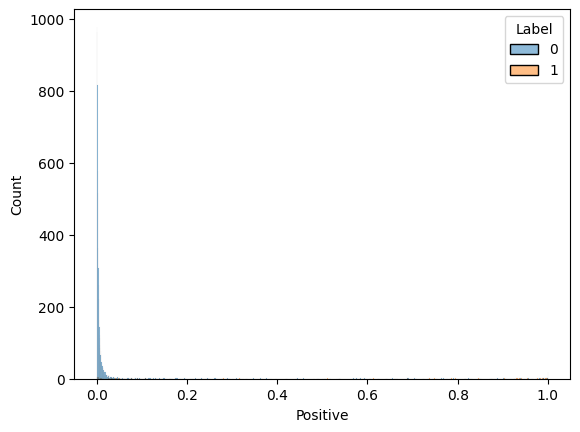

In [44]:
sns.histplot(y,x = 'Positive',hue='Label')

In [116]:
thres,f1

(0.6687008738517761, 0.618279569892473)

In [20]:
negs['Label'] = 0
pos['Label'] = 1
negs['Positive'] = 1-negs['Negative']

y = pd.concat([negs,pos])
y = y.drop(['Negative'],axis=1)

In [61]:
cm = confusion_matrix(y['Positive'],y['Label'],0.93)
cm = np.array([[cm['true_negative'],cm['false_positive']],
                [cm['false_negative'],cm['true_positive']]])

fig1,ax1 = plt.subplots(1)
sns.heatmap(cm,annot = True,
            linewidth=.5,
            fmt='g',
            cmap = 'Blues',
            cbar = False,
            xticklabels= ['Negative','Positive'],
            yticklabels= ['Negative','Positive'])

ax1.set_xlabel('Predicted', fontsize = 12) # x-axis label with fontsize 15
ax1.set_ylabel('Ground Truth', fontsize = 12) # y-axis label with fontsize 15
ax1.set_title('Config. C', fontsize = 16)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [1241]:
prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*prec*recall)/(prec+recall)

In [1242]:
s = f'Threshold:{thres}\nPrecission:{prec}\nRecall:{recall}\nF1:{f1}'
print(s)

Threshold:0.931443691253662
Precission:0.5474452554744526
Recall:0.375
F1:0.4451038575667656


In [22]:
cm = np.array([[6968,42],
               [7,254]])
prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*prec*recall)/(prec+recall)

In [23]:
s = f'Precission:{prec}\nRecall:{recall}\nF1:{f1}'
print(s)

Precission:0.8581081081081081
Recall:0.9731800766283525
F1:0.9120287253141831


# Plotting the prec. recall curves for some of the best classifiers

In [121]:
dirpos = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18PoissonNormal/ValPos.json'
dirneg = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18PoissonNormal/ValNeg.json'

positive,negative = {},{}
# Open the JSON file
with open(dirpos) as file:
    # Load the JSON data as a dictionary
    pos = json.load(file)
    pos = np.array(pos['data'])
    positive['preds'] = pos.ravel() 
    positive['labels'] = [1]*len(pos)
    
with open(dirneg) as file:
    # Load the JSON data as a dictionary
    neg = json.load(file)
    neg = np.array(neg['data'])
    negative['preds'] = neg.ravel()
    negative['labels'] = [0]*len(neg)

In [848]:
pos_frame = pd.DataFrame(positive)
neg_frame = pd.DataFrame(negative)
collected = pd.concat([pos_frame,neg_frame])

In [849]:
collected.to_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18PoissonNormal/collected.csv')

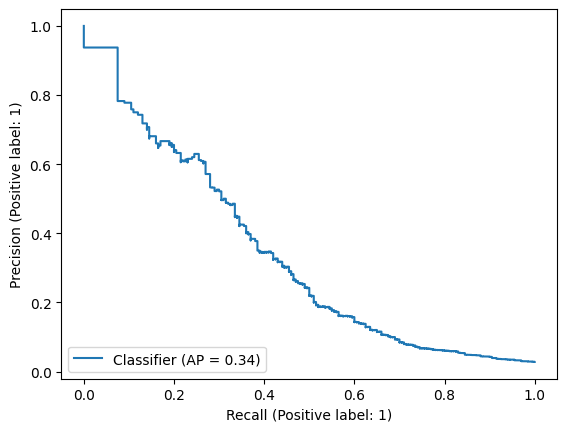

In [850]:
PrecisionRecallDisplay.from_predictions(collected['labels'],collected['preds'])

In [26]:
d = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18/collected.csv')
f = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18FocalLoss/collected.csv')
k = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18PoissonNormal/collected.csv')
ft = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/3888FinetuneAdam/collected.csv')

In [27]:
configs = [d,f,k,ft]
configs_labels = ['F','H','P','X']
for c,l in zip(configs,configs_labels): 
    c['config.'] = l

In [28]:
d['config.'][0]

'F'

In [29]:
pr_curves = pd.DataFrame(columns = ['precission','recall','conf.'])
for conf,l in zip(configs,configs_labels):
    prec,recall,_ = precision_recall_curve(conf['labels'],conf['preds'])
    pr = pd.DataFrame({'precission': prec,
          'recall': recall,
          'conf.': [conf['config.'][0]]*len(prec)})
    pr_curves = pd.concat([pr_curves,pr])

<Axes: xlabel='recall', ylabel='precission'>

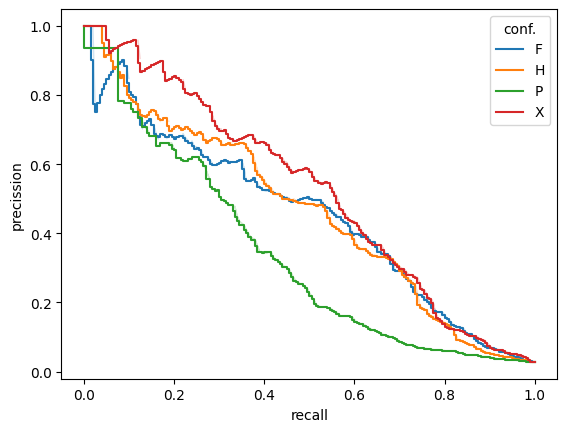

In [31]:
sns.lineplot(data = pr_curves,
             x = 'recall',
             y = 'precission',
             hue = 'conf.',
             n_boot = 1,
            drawstyle='steps-pre')

# MCNemars test 

In [297]:
def mcnemar(y_true, yhatA, yhatB, alpha=0.05):
    # perform McNemars test
    nn = np.zeros((2,2))
    c1 = yhatA - y_true == 0
    c2 = yhatB - y_true == 0

    nn[0,0] = sum(c1 & c2)
    nn[0,1] = sum(c1 & ~c2)
    nn[1,0] = sum(~c1 & c2)
    nn[1,1] = sum(~c1 & ~c2)

    n = sum(nn.flat);
    n12 = nn[0,1]
    n21 = nn[1,0]

    thetahat = (n12-n21)/n
    Etheta = thetahat

    Q = n**2 * (n+1) * (Etheta+1) * (1-Etheta) / ( (n*(n12+n21) - (n12-n21)**2) )

    p = (Etheta + 1)*0.5 * (Q-1)
    q = (1-Etheta)*0.5 * (Q-1)

    CI = tuple(lm * 2 - 1 for lm in scipy.stats.beta.interval(1-alpha, a=p, b=q) )

    p = 2*scipy.stats.binom.cdf(min([n12,n21]), n=n12+n21, p=0.5)
    print("Result of McNemars test using alpha=", alpha)
    print("Comparison matrix n")
    print(nn)
    if n12+n21 <= 10:
        print("Warning, n12+n21 is low: n12+n21=",(n12+n21))

    print("Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] = ", CI)
    print("p-value for two-sided test A and B have same accuracy (exact binomial test): p=", p)

    return thetahat, CI, p

## F&K

In [954]:
# Load F config test res
F_negs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18FocalLoss/TestNeg.csv')
F_pos = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18FocalLoss/TestPos.csv')

In [955]:
# Load K config test res
K_negs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18PoissonNormal/TestNeg.csv')
K_pos = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18PoissonNormal/TestPos.csv')

In [1014]:
threshold = 0.54031
F_negs['Label'] = 0
F_pos['Label'] = 1
F_negs['Positive'] = F_negs['Negative']
F = pd.concat([F_negs,F_pos])
F = F.drop(['Negative'],axis=1)
F['preds'] = F['Positive'] > threshold

In [1015]:
threshold = 0.9999890327453612
K_negs['Label'] = 0
K_pos['Label'] = 1
K_negs['Positive'] = K_negs['Negative']
K = pd.concat([K_negs,K_pos])
K = K.drop(['Negative'],axis=1)
K['preds'] = K['Positive'] > threshold

In [1016]:
y_true = K['Label']
thetahat, CI, p = mcnemar(y_true, F['preds'].to_numpy(), K['preds'].to_numpy(), alpha=0.05)

Result of McNemars test using alpha= 0.05
Comparison matrix n
[[6985.   72.]
 [  47.  106.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (0.0005032579587580521, 0.006431524755008189)
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 0.027379102500930338


### E&F

In [995]:
# Load F config test res
F_negs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18FocalLoss/TestNeg.csv')
F_pos = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18FocalLoss/TestPos.csv')

In [996]:
# Load F config test res
E_negs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18/TestNeg.csv')
E_pos = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18/TestPos.csv')

In [1002]:
def convert(negs,pos,threshold):
    negs['Label'] = 0
    pos['Label'] = 1
    negs['Positive'] = negs['Negative']
    conf = pd.concat([negs,pos])
    conf = conf.drop(['Negative'],axis=1)
    conf['preds'] = conf['Positive'] > threshold
    return conf['preds'].to_numpy()

In [1004]:
E = convert(E_negs,E_pos,0.94)
F = convert(F_negs,F_pos,0.54)

In [1005]:
y_true = l1
thetahat, CI, p = mcnemar(y_true, F, E[:-1], alpha=0.05)

Result of McNemars test using alpha= 0.05
Comparison matrix n
[[6913.  144.]
 [ 107.   46.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (0.0008268964732307538, 0.009436532617773885)
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 0.02287824570301389


### Ft&F

In [1025]:
# Load F config test res
F_negs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18FocalLoss/TestNeg.csv')
F_pos = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18FocalLoss/TestPos.csv')

In [1027]:
# Load F config test res
ft_negs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/3888FinetuneAdam/TestNeg.csv')
ft_pos = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/3888FinetuneAdam/TestPos.csv')

In [1028]:
ft = convert(ft_negs,ft_pos,0.51)
F = convert(F_negs,F_pos,0.54)

In [1031]:
thetahat, CI, p = mcnemar(y_true, F, ft, alpha=0.05)

Result of McNemars test using alpha= 0.05
Comparison matrix n
[[7021.   36.]
 [  37.  116.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (-0.0024611310586760693, 0.0021837392860852844)
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 0.9999999999999998


In [1032]:
thetahat

-0.00013869625520110957

## I&B

In [1042]:
# Load F config test res
I_negs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/MobileNetV2Gaussian/TestNeg.csv')
I_pos = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/MobileNetV2Gaussian/TestPos.csv')

In [1043]:
# Load F config test res
b_negs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/MobileNetv2/TestNeg.csv')
b_pos = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/MobileNetv2/TestPos.csv')

In [1044]:
b = convert(b_negs,b_pos,0.8783)
i = convert(I_negs,I_pos,0.646)

In [1047]:
thetahat, CI, p = mcnemar(y_true, i, b[:-1], alpha=0.05)

Result of McNemars test using alpha= 0.05
Comparison matrix n
[[6883.  150.]
 [  69.  108.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (0.007220096196719261, 0.01524851858279308)
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 4.578143506073763e-08


## Confusion matricies 

Text(0.5, 1.0, 'Config. F')

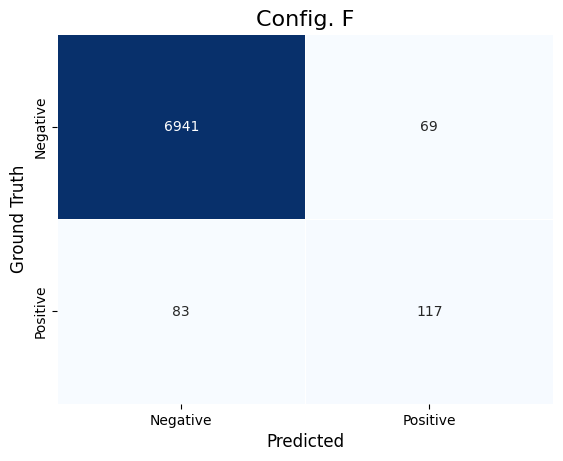

In [1011]:
#cm = confusion_matrix(F,y_true,0.5)
cm = np.array([[6941,69],
               [83,117]])

fig1,ax1 = plt.subplots(1)
sns.heatmap(cm,annot = True,
            linewidth=.5,
            fmt='g',
            cmap = 'Blues',
            cbar = False,
            xticklabels= ['Negative','Positive'],
            yticklabels= ['Negative','Positive'])

ax1.set_xlabel('Predicted', fontsize = 12) # x-axis label with fontsize 15
ax1.set_ylabel('Ground Truth', fontsize = 12) # y-axis label with fontsize 15
ax1.set_title('Config. F', fontsize = 16)

In [1012]:
prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*prec*recall)/(prec+recall)

In [1013]:
s = f'Precission:{prec}\nRecall:{recall}\nF1:{f1}'
print(s)

Precission:0.6290322580645161
Recall:0.585
F1:0.6062176165803109


### K

In [1020]:
cm = confusion_matrix(K['preds'],y_true,0.5)
cm = np.array([[cm['true_negative'],cm['false_positive']],
                [cm['false_negative'],cm['true_positive']]])

In [1022]:
prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*prec*recall)/(prec+recall)
s = f'Precission:{prec}\nRecall:{recall}\nF1:{f1}'
print(s)

Precission:0.5846153846153846
Recall:0.38
F1:0.46060606060606063


Text(0.5, 1.0, 'Config. K')

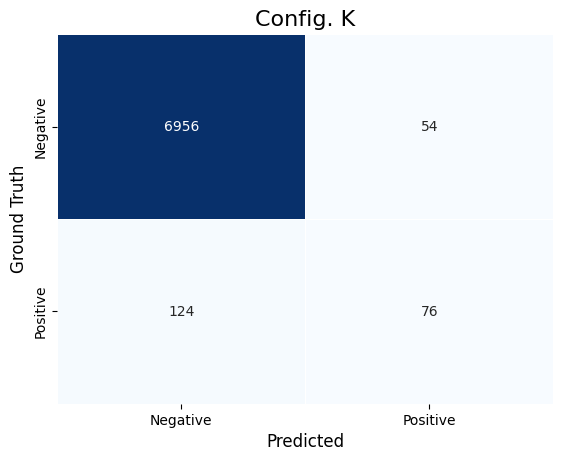

In [1024]:
fig1,ax1 = plt.subplots(1)
sns.heatmap(cm,annot = True,
            linewidth=.5,
            fmt='g',
            cmap = 'Blues',
            cbar = False,
            xticklabels= ['Negative','Positive'],
            yticklabels= ['Negative','Positive'])

ax1.set_xlabel('Predicted', fontsize = 12) # x-axis label with fontsize 15
ax1.set_ylabel('Ground Truth', fontsize = 12) # y-axis label with fontsize 15
ax1.set_title('Config. K', fontsize = 16)

## Q

In [1048]:
# Load F config test res
Q_negs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/3888FinetuneAdam/TestNeg.csv')
Q_pos = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/3888FinetuneAdam/TestPos.csv')

In [1050]:
cm = np.array([[6936,74],
                [78,122]])

In [1051]:
prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*prec*recall)/(prec+recall)
s = f'Precission:{prec}\nRecall:{recall}\nF1:{f1}'
print(s)

Precission:0.6224489795918368
Recall:0.61
F1:0.6161616161616161


Text(0.5, 1.0, 'Config. Q')

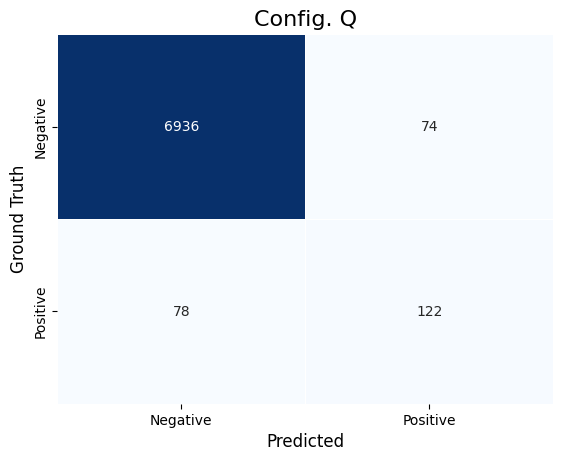

In [1053]:
fig1,ax1 = plt.subplots(1)
sns.heatmap(cm,annot = True,
            linewidth=.5,
            fmt='g',
            cmap = 'Blues',
            cbar = False,
            xticklabels= ['Negative','Positive'],
            yticklabels= ['Negative','Positive'])

ax1.set_xlabel('Predicted', fontsize = 12) # x-axis label with fontsize 15
ax1.set_ylabel('Ground Truth', fontsize = 12) # y-axis label with fontsize 15
ax1.set_title('Config. Q', fontsize = 16)

## Synthetic test set 

In [1263]:
cm = np.array([[6968,42],
                [7,254]])

In [1264]:
prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*prec*recall)/(prec+recall)
s = f'Precission:{prec}\nRecall:{recall}\nF1:{f1}'
print(s)

Precission:0.8581081081081081
Recall:0.9731800766283525
F1:0.9120287253141831


## Paretofront plot 

In [1054]:
data = {"Precission": [0.07,0.22,0.12,0.55,0.62,0.63,0.59,0.52,0.6,0.53,0.58,0.06,0.37,0.47,0.51,0.41,0.62],
        "Recall": [0.44,0.22,0.09,0.56,0.52,0.59,0.56,0.53,0.36,0.47,0.39,0.13,0.37,0.38,0.31,0.32,0.61],
        "Config.": ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q']}

In [1055]:
df = pd.DataFrame(data)

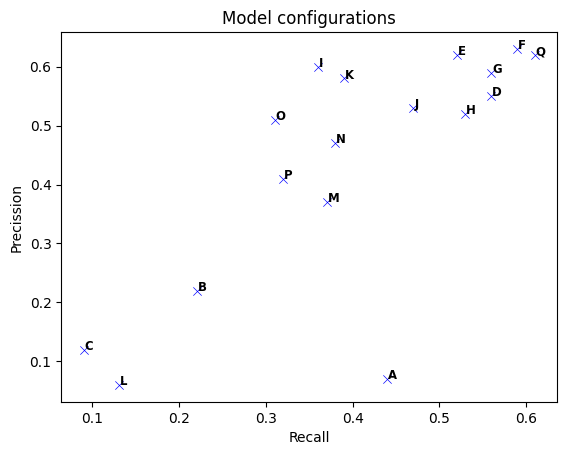

In [1068]:
sns.scatterplot(data=data,y='Precission',x='Recall',marker = 'x', color = 'blue')
plt.title('Model configurations')
# add text annotation
for idx,row in df.iterrows():
    x = row['Recall']
    y = row['Precission']
    config = row['Config.']
    
    plt.text(x+0.001, y,
             config,
             horizontalalignment='left',
             size='small',
             color='black',
             weight='semibold')

# Examples of FP and FN

In [20]:
import torch 
import torchvision
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor,Resize
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torchvision.transforms.functional as F

In [35]:
model = models.resnet18()
#out_dim = model.fc.in_features
#model.fc = nn.Linear(out_dim, 1)

In [36]:
class ResnetModules(nn.Module):
    def __init__(self, model):
        super(ResnetModules, self).__init__()
        self.resnet = model
        self.out_dim = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(self.out_dim, 1)
        self.sigmoid = nn.Sigmoid()
        # Change input size to be of size 320x320x1
        #if padding:
        #    self.resnet.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)

    def forward(self, x):
        # Resize image to input size of the model
        x = self.resnet(x)
        x = self.sigmoid(x)
        x = torch.ravel(x)
        return x

In [37]:
model = ResnetModules(model)

In [349]:
model_path = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Models/resnet18_6504_testf1_0.6161616444587708.tar'
state_dict = torch.load(model_path,map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

<All keys matched successfully>

In [350]:
test_transform = transforms.Compose(
    [
     transforms.PILToTensor(),
     transforms.ConvertImageDtype(torch.float),
     Resize((430,430)),#ZeroPad((430,430))
     transforms.Normalize((0.51, 0.51, 0.51), (0.15, 0.15, 0.15))
    ]
)
test_set = torchvision.datasets.ImageFolder('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/ImageFolderComp/Test',
                                            transform = test_transform)

In [351]:
test_loader = DataLoader(test_set,batch_size=1)

In [219]:
# Define the test function
threshold = 0.51
false_positives = []
fale_negatives = []
model.eval()
predictions, labels = [], []
c = 0
with torch.no_grad():
    for idx,(X,y) in enumerate(test_loader):
        #if idx < 7010:
        #    next
        pred = model(X)
        
        
        if ((pred>threshold) == 1) and y == 0:
            false_positives.append(X)
        if ((pred>threshold) == 0) and y == 1:
            fale_negatives.append(X)
        
        predictions.append(pred)
        labels.append(y)
        
        y = y.to(torch.float64)
        pred = pred.to(torch.float64)
        
        if idx % 100 == 0:
            print(idx)
        
predictions = torch.cat(predictions)
labels = torch.cat(labels)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200


## Creating a plot for false Negative examples

In [336]:
def show(imgs,probs):
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False,figsize = (10,5))
    for i in range(imgs.shape[0]):
        img = imgs[i,:,:]
        img = img.detach()
        axs[0, i].imshow(np.asarray(img),cmap = 'gray')
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        
        # Set probs as title
        p = np.round(probs[i],3)
        axs[0,i].set_title(f'p={p}')

##### plot the examples 

In [343]:
ims = [(im[0,0,:,:].T+0.51)*0.15 for im in fale_negatives[15:20]]
probs = [model(X).detach().item() for X in fale_negatives[15:20]]
grid = make_grid(ims)

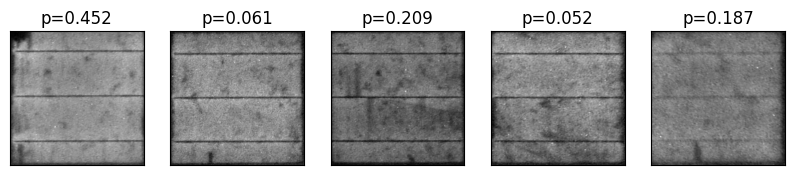

In [344]:
show(grid,probs)

##### Plot the false positive examples 

In [345]:
ims = [(im[0,0,:,:].T+0.51)*0.15 for im in false_positives[15:20]]
probs = [model(X).detach().item() for X in false_positives[15:20]]
grid = make_grid(ims)

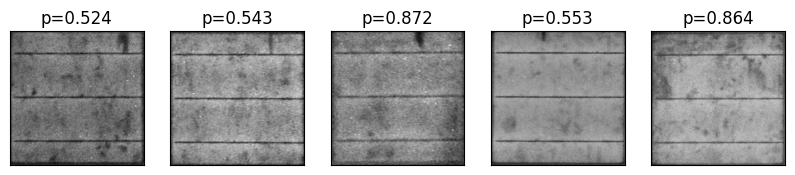

In [346]:
show(grid,probs)

# Class activation maps

In [646]:
# Set your CAM extractor
from torchcam.methods import SmoothGradCAMpp
from torchvision.transforms.functional import normalize, resize, to_pil_image
import random

In [508]:
class ResnetModules(nn.Module):
    def __init__(self, model):
        super(ResnetModules, self).__init__()
        self.resnet = model
        self.out_dim = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(self.out_dim, 1)
        self.sigmoid = nn.Sigmoid()
        # Change input size to be of size 320x320x1
        #if padding:
        #    self.resnet.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)

    def forward(self, x):
        # Resize image to input size of the model
        x = self.resnet(x)
        x = self.sigmoid(x)
        #x = torch.ravel(x)
        return x

In [1069]:
model = models.resnet18()
model = ResnetModules(model)
for param in model.parameters():
    param.requires_grad = True

In [1074]:
model.resnet.fc.requires_grad = True

In [510]:
model_path = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Models/resnet18_id_6676_epoch_19.tar'
state_dict = torch.load(model_path,map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
cam_extractor = SmoothGradCAMpp(model)

In [511]:
input_list = [im for im in false_positives[15:20]]
input_tensor = input_list[1][0,:,:,:]

In [512]:
out = model(input_tensor.unsqueeze(0))
# Retrieve the CAM by passing the class index and the model output
activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)

### Overlay the image with the cam 

In [710]:
def combine_cam_image(activation_map,im,alpha=0.5):
    im = (im+0.51)*0.15
    cam = resize(activation_map[0],(430,430))
    overlay = np.asarray(cam)
    combined = alpha * np.asarray(im) + (1 - alpha) * overlay
    return combined

# First do it for the FP's

In [606]:
def get_cams(model,imgs):
    input_list = [im for im in imgs]
    model.eval()
    probs = [model(X).detach().item() for X in imgs]
    inputs = []
    act_maps = []
    for i in range(len(input_list)):
        # Extract the images: 
        input_tensor = input_list[i][0,:,:,:]
        inputs.append(input_tensor)
        
        out = model(input_tensor.unsqueeze(0))
        
        # Retrieve the CAM by passing the class index and the model output
        activation_map = cam_extractor(out.squeeze(0).argmax().item(), out)
        act_maps.append(activation_map)
    return inputs,act_maps,probs

In [711]:
def combine_input_and_cam(inputs,act_maps,alpha = 0.5):
    combs = []
    for im,cam in zip(inputs,act_maps):
        combined = combine_cam_image(cam,im,alpha = alpha)
        combs.append(combined)
    return combs

In [750]:
def plot_combined(inputs,combs,probs):
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 0.01, bottom = 0, right = 0.01, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    
    fig,ax = plt.subplots(2,5, figsize = (10,5))
    for i in range(5):
        ax[0,i].imshow(inputs[i][0,:,:],cmap = 'gray')
        ax[0,i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        
        ax[1,i].imshow(combs[i][0,:,:],cmap = 'jet')
        ax[1,i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        
        # Set probs as title
        p = np.round(probs[i],3)
        ax[0,i].set_title(f'p={p}')

In [758]:
inputs,act_maps,probs = get_cams(model,false_positives[20:30])
combs = combine_input_and_cam(inputs,act_maps)

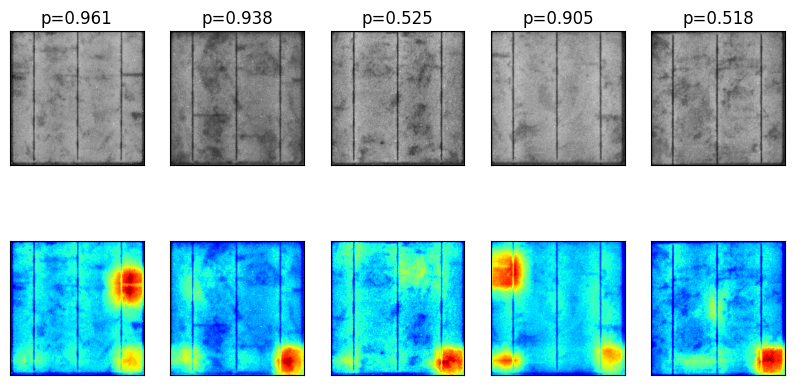

In [759]:
plot_combined(inputs,combs,probs)

## Now do it for the FN's

In [760]:
inputs,act_maps,probs = get_cams(model,fale_negatives[20:30])
combs = combine_input_and_cam(inputs,act_maps)

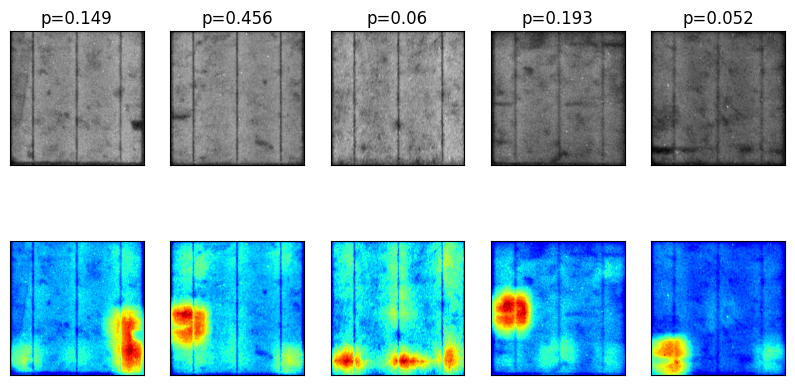

In [761]:
plot_combined(inputs,combs,probs)

In [645]:
len(combs)

71

### Do it for some true positives

In [755]:
pos_examples = [test_set[random.randint(7010,7210)] for idx in range(0,5)]
pos_images = [p[0][None,:,:,:] for p in pos_examples]
pos_labels = [[p[1] for p in pos_examples]]

In [756]:
inputs,act_maps,probs = get_cams(model,pos_images)
combs = combine_input_and_cam(inputs,act_maps,alpha = 0.3)

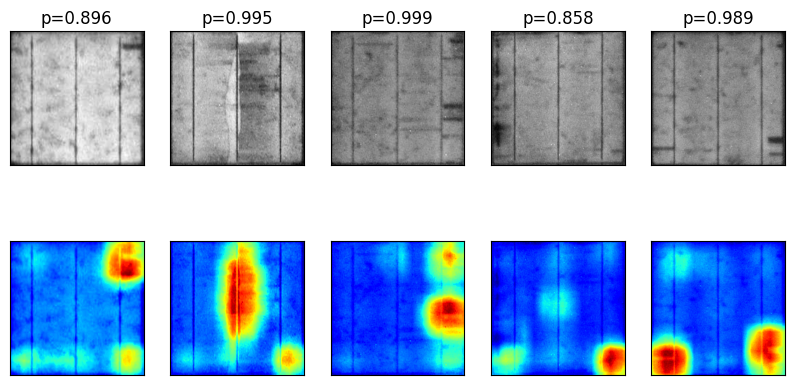

In [757]:
plot_combined(inputs,combs,probs)

In [702]:
len(test_set.targets)

7210

# Freezing some layers-test

In [1279]:
import ast
converters = {
    'Label': lambda x: ast.literal_eval(x),
    'MaskDir': lambda x: ast.literal_eval(x) if str(x) != 'nan' else x
}

In [1280]:
df = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/TestVitusStat.csv',
                converters = converters)

In [1281]:
faults_expanded = df[df['is_fault']].explode(['Label','MaskDir'])
no_faults_expanded =df[df['is_fault'] != True].explode('Label')

In [1282]:
df = pd.concat([faults_expanded,no_faults_expanded])

In [1283]:
df.to_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/TestVitusStatExpanded.csv')

In [1284]:
45+57+32+169

303

# Getting statistic on how many FP was caused by sorting

In [21]:
test_transform = transforms.Compose(
    [
     transforms.ConvertImageDtype(torch.float),
     Resize((430,430)),#ZeroPad((430,430))
     transforms.Normalize((0.51, 0.51, 0.51), (0.15, 0.15, 0.15))
    ]
)

In [22]:
class ImageDataset(Dataset):
    def __init__(self,data_frame, transform=None):
        self.transform = transform
        self.data = data_frame
        self.base_dir ='/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data'
        
    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        file_name = self.data['ImageDir'][index]
        path = f'{self.base_dir}/{file_name}'
        image = transforms.ToTensor()(Image.open(path)).to(torch.float64)
        image = torch.cat([image,image,image])
        label = 0 if 'Negative' in self.data['Label'][index] else 1

        if self.transform is not None:
            image = self.transform(image)
            
        #Get the original label
        org_label = self.data['org_label'][index]
        org_label = 0 if 'Negative' in org_label else 1 

        return image,label, org_label

In [23]:
org_data = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/EkstraDetection/Corr_with_labels.csv')

In [24]:
def get_name(dir):
    key = dir.split('/')[-1]
    key = key.replace('_PC','')
    key = key[:-4]
    return key

In [25]:
from scipy.io import loadmat

In [38]:
import ast
converters = {'Label': lambda x: ast.literal_eval(x)}
test = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/TestVitusStat.csv')
test = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/DataSetVitusStats.csv',
                  converters = converters)

In [39]:
test['name'] = test['ImageDir'].apply(get_name)

In [40]:
def load_mat_file(row):
    base = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Serier'
    name = row['name']
    serie = row['ImageDir'].split('/')[2]
    directory = f'{base}/{serie}/MaskGT/GT_{name}.mat'
    directory = directory.replace('ImageCorr','Image')
    return loadmat(directory)

In [41]:
def format_mat_file(mat):
    label = mat['GTLabel'].ravel()
    mask = mat['GTMask']
    label = [l[0] for l in label]
    return label,mask

In [42]:
labels = []
masks = []
shapes = []
for idx,row in test.iterrows():
    try:
        mat = load_mat_file(row)
        label,mask = format_mat_file(mat)
        labels.append(label)
        masks.append(mask)
    except:
        labels.append(['Negative'])
        masks.append([0])
        pass

In [43]:
test['org_label'] = labels

##### Doing a quick check on the sorting 
This is kinda messy, but it is a last minute check of some stuff

In [44]:
changed_label = 0
for i,row in test.iterrows():
    org_label = row['org_label']
    label = row['Label']
    
    if org_label[0] != label[0]:
        changed_label += 1
        
print(changed_label)

1000


In [48]:
test.is_fault.sum()

1000

['Negative']

Continue the rest

In [32]:
dataset = ImageDataset(data_frame = test, transform = test_transform)
dataset[0][0].mean()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data//Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Serier/Series1/CellsCorr/Serie_1_ImageCorr_-1_4100_Cell_Row6_Col_3.png'

In [365]:
dataset = ImageDataset(data_frame = test, transform = test_transform)
test_loader = DataLoader(dataset,batch_size=1)

In [368]:
# Define the test function
threshold = 0.51
false_positives = []
false_negatives = []
model.eval()
predictions, labels = [], []
org_labels = []
c = 0
with torch.no_grad():
    for idx,(X,y,y_org) in enumerate(test_loader):
        #if idx < 7010:
        #    next
        pred = model(X)
        
        
        if ((pred>threshold) == 1) and y == 0:
            false_positives.append(X)
        if ((pred>threshold) == 0) and y == 1:
            false_negatives.append(X)
        
        predictions.append(pred)
        labels.append(y)
        org_labels.append(y_org)
        
        y = y.to(torch.float64)
        pred = pred.to(torch.float64)
        
        if idx%100 == 0:
            print(idx)
            
        
predictions = torch.cat(predictions)
labels = torch.cat(labels)
org_labels = torch.cat(org_labels)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200


#### Now get which ones are actually our fault from the thresholding

In [373]:
from torchmetrics import F1Score,ConfusionMatrix,ROC,PrecisionRecallCurve

In [377]:
confmat = ConfusionMatrix(task="binary", num_classes=2, threshold=float(0.51))

In [378]:
confmat(predictions,labels)

tensor([[6936,   74],
        [  78,  122]])

In [379]:
preds_thresholded = predictions > 0.51

In [380]:
fp_indexes = []

for i in range(len(preds_thresholded)):
    
    if preds_thresholded[i] == 1 and labels[i] == 0 and org_labels[i] == 1: 
        fp_indexes.append(i)



In [381]:
fp_indexes

[2284, 3434, 4598]

In [387]:
im1 = dataset[2284][0].numpy()[0,:,:]
im2 = dataset[3434][0].numpy()[0,:,:]
im3 = dataset[4598][0].numpy()[0,:,:]

In [425]:
predictions[4598]

tensor(0.5855)

Text(0.5, 1.0, 'p = 0.59')

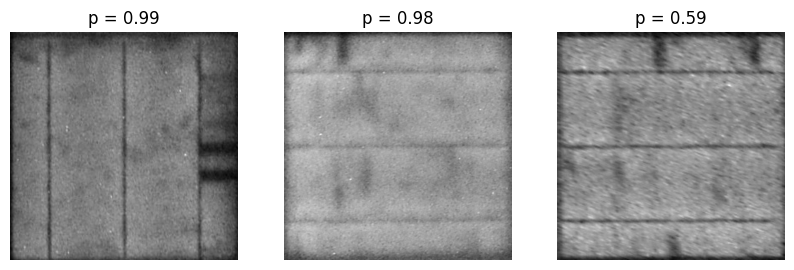

In [426]:
fig,ax = plt.subplots(1,3,figsize = (10,5))
ax[0].imshow(im1,cmap = 'gray')
ax[0].axis('off')
ax[0].set_title('p = 0.99')

ax[1].imshow(im2,cmap = 'gray')
ax[1].axis('off')
ax[1].set_title('p = 0.98')

ax[2].imshow(im3,cmap = 'gray')
ax[2].axis('off')
ax[2].set_title('p = 0.59')

(-0.5, 271.5, 275.5, -0.5)

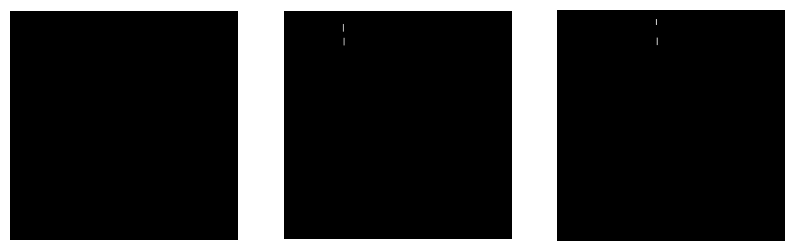

In [428]:
fig,ax = plt.subplots(1,3,figsize = (10,5))
ax[0].imshow(masks[2284],cmap = 'gray')
ax[0].axis('off')
ax[1].imshow(masks[3434],cmap = 'gray')
ax[1].axis('off')
ax[2].imshow(masks[4598],cmap = 'gray')
ax[2].axis('off')

## How many parameters? 

In [429]:
class ResnetModules(nn.Module):
    def __init__(self, model):
        super(ResnetModules, self).__init__()
        self.resnet = model
        self.out_dim = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(self.out_dim, 1)
        self.sigmoid = nn.Sigmoid()
        # Change input size to be of size 320x320x1
        #if padding:
        #    self.resnet.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)

    def forward(self, x):
        # Resize image to input size of the model
        x = self.resnet(x)
        x = self.sigmoid(x)
        #x = torch.ravel(x)
        return x

In [430]:
class MobileNetModules(nn.Module):
    def __init__(self, model):
        super(MobileNetModules, self).__init__()
        self.mobilenet = model
        #Input size is 440x440x1
        self.mobilenet.features[0][0] = nn.Conv2d(3, 32, kernel_size=7, stride=2, padding=3, bias=False)
        self.mobilenet.classifier[1] = nn.Linear(1280, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.mobilenet(x)
        x = self.sigmoid(x)
        x = torch.ravel(x)
        return x

In [433]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [432]:
model = models.resnet18()
res18 = ResnetModules(model)

In [434]:
count_parameters(res18)

11177025

In [435]:
model = models.resnet34()
res34 = ResnetModules(model)
count_parameters(res34)

21285185

In [436]:
model = models.resnet50()
res50 = ResnetModules(model)
count_parameters(res50)

23510081

In [437]:
model = models.mobilenet_v2()
mobv2 = MobileNetModules(model)
count_parameters(mobv2)

2228993

# Conformal prediction for best classifier

In [62]:
base = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities'
model = '3888FinetuneAdam'
preds = pd.read_csv(f'{base}/{model}/collected.csv')
preds['pos'] = preds['preds']
preds['neg'] = 1-preds['preds']

In [63]:
#Load
test_pos = pd.read_csv(f'{base}/{model}/TestPos.csv')
test_neg = pd.read_csv(f'{base}/{model}/TestNeg.csv')

test_pos['Label'] = 1
test_neg['Label'] = 0

test_neg['Positive'] = test_neg['Negative']
test_preds = pd.concat([test_pos,test_neg])
test_preds = test_preds.drop('Negative',axis = 1)
test_preds['Negative'] = 1-test_preds['Positive']

In [64]:
n = 400
predictions = np.array([preds['pos'].to_numpy()[:n],preds['neg'].to_numpy()[:n]])
predictions = predictions.T
cal_labels = preds['labels'].to_numpy()

In [65]:
scores = [x[0] if cal_labels[idx] == 1 else x[1] for idx,x in enumerate(predictions)]

In [66]:
len(y)

7210

In [67]:
alpha = 0.25
q_hat = np.quantile(scores,np.ceil((n+1)*(1-alpha))/n)
q_hat

0.9952128756954335

In [68]:
np.quantile(scores,[0.25,0.5,0.85])

array([0.58530028, 0.98991445, 0.99646918])

In [69]:
X_test = np.array([test_preds['Positive'].to_numpy(),test_preds['Negative'].to_numpy()]).T

In [70]:
prediction_sets = []

for pred in X_test:
    X_i = []
    if pred[0] >= q_hat:
        X_i.append('Positive')
    if pred[1] >= q_hat:
        X_i.append('Negative')
    
    if pred[0] < q_hat and pred[1] < q_hat:
        X_i.append('Positive')
        X_i.append('Negative')
        
    prediction_sets.append(X_i)

In [71]:
len(prediction_sets)

7210

In [72]:
len(y)

7210

In [73]:
y = test_preds['Label'].to_numpy()

In [74]:
# Keep track of the double sets and their indexes 
double_indexes = []
double_labels = []

for idx,p_set in enumerate(prediction_sets):
    if len(p_set) > 1:
        double_indexes.append(idx)
        double_labels.append(y[idx])

In [75]:
len(double_indexes),len(y)

(3087, 7210)

In [76]:
sum(double_labels)

141

In [77]:
prediction_sets = np.array(prediction_sets,dtype=object)
labels = np.array(y,dtype=object)

corrected_preds = np.delete(prediction_sets,double_indexes)
corrected_labels = np.delete(labels,double_indexes)

In [78]:
corrected_preds

array([list(['Positive']), list(['Positive']), list(['Negative']), ...,
       list(['Negative']), list(['Negative']), list(['Negative'])],
      dtype=object)

In [79]:
corrected_preds = np.array([0 if x[0] == 'Negative' else 1 for x in corrected_preds])

In [80]:
sum(corrected_preds)

50

In [81]:
len(labels)

7210

In [82]:
cm = confusion_matrix(corrected_preds,corrected_labels,0.5)
cm = np.array([[cm['true_negative'],cm['false_positive']],
               [cm['false_negative'],cm['true_positive']]])

In [83]:
prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*prec*recall)/(prec+recall)

In [84]:
s = f'Precission:{prec}\nRecall:{recall}\nF1:{f1}'
print(s)

Precission:0.86
Recall:0.7288135593220338
F1:0.7889908256880733


In [85]:
cm

array([[4057,    7],
       [  16,   43]])

## Group balanced CM 

In [952]:
pos_predictions = predictions[:200,0]
neg_predictions = predictions[200:,1]

In [953]:
len(pos_predictions),len(neg_predictions)

(200, 7010)

In [954]:
scores_pos = pos_predictions
scores_neg = neg_predictions

In [959]:
alpha = 0.25
n = len(pos_predictions)
q_hat_pos = np.quantile(scores_pos,np.ceil((n+1)*(1-alpha))/n)
q_hat_pos

0.983675883114338

In [960]:
alpha = 0.2
n = len(neg_predictions)
q_hat_neg = np.quantile(neg_predictions,np.ceil((n+1)*(1-alpha))/n)
q_hat_neg

0.9973423169323307

In [961]:
prediction_sets = []

for pred in X_test:
    X_i = []
    if pred[0] >= q_hat_pos:
        X_i.append('Positive')
    if pred[1] >= q_hat_neg:
        X_i.append('Negative')
    
    if pred[0] < q_hat_pos and pred[1] < q_hat_neg:
        X_i.append('Positive')
        X_i.append('Negative')
        
    prediction_sets.append(X_i)

In [1106]:
# Keep track of the double sets and their indexes 
double_indexes = []
double_labels = []

for idx,p_set in enumerate(prediction_sets):
    if len(p_set) > 1:
        double_indexes.append(idx)
        double_labels.append(y[idx])

In [1108]:
len(double_indexes)

3087

In [1110]:
sum(double_labels)

141

##### Performance of the classifier after conformal sorting: 


In [ ]:
prediction_sets = np.array(prediction_sets,dtype=object)
labels = np.array(y,dtype=object)

corrected_preds = np.delete(prediction_sets,double_indexes)
corrected_labels = np.delete(labels,double_indexes)

## Prøv med en anden classifier der har mere ls 

In [312]:
dirpos = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/MoreLS/TestPos.json'
dirneg = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/MoreLS/TestNeg.json'

def get_collected_preds(dirpos,dirneg):
    positive,negative = {},{}
    # Open the JSON file
    with open(dirpos) as file:
        # Load the JSON data as a dictionary
        pos = json.load(file)
        pos = np.array(pos['data'])
        positive['preds'] = pos.ravel() 
        positive['labels'] = [1]*len(pos)
        
    with open(dirneg) as file:
        # Load the JSON data as a dictionary
        neg = json.load(file)
        neg = np.array(neg['data'])
        negative['preds'] = neg.ravel()
        negative['labels'] = [0]*len(neg)
    
    pos_frame = pd.DataFrame(positive)
    neg_frame = pd.DataFrame(negative)
    collected = pd.concat([pos_frame,neg_frame])
    
    return collected

collected_test = get_collected_preds(dirpos,dirneg)


dirpos = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/MoreLS/ValPos.json'
dirneg = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/MoreLS/ValNeg.json'
collected_val =  get_collected_preds(dirpos,dirneg)

In [313]:
n = 7210
predictions = np.array([1-collected_val['preds'].to_numpy()[:n],collected_val['preds'].to_numpy()[:n]])
predictions = predictions.T
cal_labels = preds['labels'].to_numpy()

In [1253]:
test_labels = collected_test['labels'].to_numpy()
cal_preds = predictions
test_preds = np.array([1-collected_test['preds'].to_numpy(),collected_test['preds'].to_numpy()]).T

In [1254]:
def score_function(X,y):
    if X.argmax() == y: 
        score = X[X.argmax()]
    else:
        score = X.sum()
    return score

In [1255]:
scores = []
for i in range(len(cal_preds)):
    s = score_function(cal_preds[i,:],cal_labels[i])
    scores.append(s)

In [1270]:
alpha = 0.2
n = len(scores)
q_hat = np.quantile(scores,np.ceil((n+1)*(1-alpha))/n)
q_hat

1.0

In [1262]:
prediction_sets = []

for pred in test_preds:
    X_i = []
    if pred[1] <= q_hat:
        X_i.append('Positive')
    if pred[0] <= q_hat:
        X_i.append('Negative')
    
    if pred[0] < q_hat and pred[1] < q_hat:
        X_i.append('Positive')
        X_i.append('Negative')
        
    prediction_sets.append(X_i)

In [1263]:
# Keep track of the double sets and their indexes 
double_indexes = []
double_labels = []

for idx,p_set in enumerate(prediction_sets):
    if len(p_set) > 1:
        double_indexes.append(idx)
        double_labels.append(y[idx])

In [1264]:
len(double_indexes),sum(double_labels)

(4426, 100)

In [1265]:
prediction_sets

[['Positive', 'Negative'],
 ['Positive', 'Negative'],
 ['Positive'],
 ['Positive', 'Negative'],
 ['Positive'],
 ['Positive', 'Negative'],
 ['Positive'],
 ['Positive'],
 ['Positive', 'Negative'],
 ['Negative'],
 ['Positive', 'Negative'],
 ['Positive', 'Negative'],
 ['Positive', 'Negative'],
 ['Positive', 'Negative'],
 ['Positive'],
 ['Positive'],
 ['Positive', 'Negative'],
 ['Positive', 'Negative'],
 ['Positive', 'Negative'],
 ['Positive'],
 ['Positive', 'Negative'],
 ['Positive', 'Negative'],
 ['Positive', 'Negative'],
 ['Positive'],
 ['Positive', 'Negative'],
 ['Positive'],
 ['Positive'],
 ['Positive', 'Negative'],
 ['Positive', 'Negative'],
 ['Positive', 'Negative'],
 ['Positive', 'Negative'],
 ['Positive'],
 ['Positive', 'Negative'],
 ['Positive'],
 ['Positive', 'Negative'],
 ['Positive'],
 ['Positive'],
 ['Positive'],
 ['Positive'],
 ['Positive'],
 ['Positive'],
 ['Positive'],
 ['Positive', 'Negative'],
 ['Positive'],
 ['Positive'],
 ['Positive'],
 ['Positive'],
 ['Positive', 'Nega

In [1251]:
prediction_sets = np.array(prediction_sets,dtype=object)
labels = np.array(test_labels,dtype=object)

corrected_preds = np.delete(prediction_sets,double_indexes)
corrected_labels = np.delete(labels,double_indexes)

corrected_preds = np.array([0 if x[0] == 'Negative' else 1 for x in corrected_preds])
cm = confusion_matrix(corrected_preds,corrected_labels,0.5)
cm = np.array([[cm['true_negative'],cm['false_positive']],
               [cm['false_negative'],cm['true_positive']]])

prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*prec*recall)/(prec+recall)

s = f'Precission:{prec}\nRecall:{recall}\nF1:{f1}'
print(s)

Precission:0.7037037037037037
Recall:0.9620253164556962
F1:0.8128342245989305


(array([ 88.,  97., 144., 107.,  96.,  69.,  73.,  38.,  36., 252.]),
 array([0.50061128, 0.55055015, 0.60048902, 0.65042789, 0.70036677,
        0.75030564, 0.80024451, 0.85018338, 0.90012226, 0.95006113,
        1.        ]),
 <BarContainer object of 10 artists>)

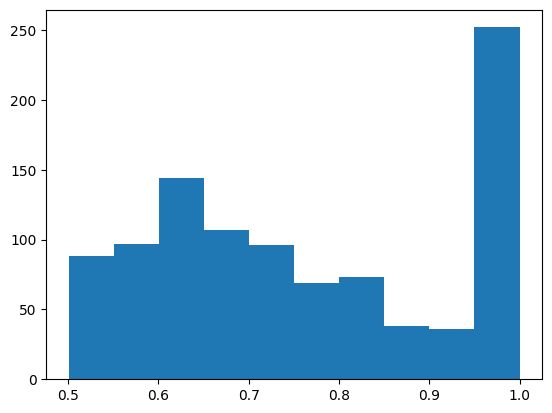

In [1266]:
plt.hist(scores)

In [157]:
pos

,Positive
0,0.942519
1,0.991223
2,0.217613
3,0.942087
4,0.239191
...,...
195,0.253196
196,0.581269
197,0.823917
198,0.956134


In [156]:
pos= pd.read_csv(f'{base}/{model}/ValPos.csv')
neg = pd.read_csv(f'{base}/{model}/ValNeg.csv')

In [158]:
pos['preds'] = pos['Positive']
neg['preds'] = neg['Negative']
pos['labels'],neg['labels'] = 1,0

collected = pd.concat([pos,neg])

In [159]:
collected = collected.drop(['Positive','Negative'],axis = 1)

In [160]:
collected.to_csv(f'{base}/{model}/collected.csv')

## Adaptive pred sets: 

In [161]:
base = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities'
model = 'MoreLS'
preds = pd.read_csv(f'{base}/{model}/collected.csv')
preds['pos'] = preds['preds']
preds['neg'] = 1-preds['preds']

In [167]:
dirpos =f'{base}/{model}/ValPos.json'
dirneg = f'{base}/{model}/ValNeg.json'
test_preds = get_collected_preds(dirpos,dirneg)
test_preds['Positive'],test_preds['Negative'] = test_preds['preds'],1-test_preds['preds']
test_preds['Label'] = test_preds['labels']

In [168]:
preds

,Unnamed: 0,preds,labels,pos,neg
0,0,0.942519,1,0.942519,0.057481
1,1,0.991223,1,0.991223,0.008777
2,2,0.217613,1,0.217613,0.782387
3,3,0.942087,1,0.942087,0.057913
4,4,0.239191,1,0.239191,0.760809
...,...,...,...,...,...
7206,7006,0.435136,0,0.435136,0.564864
7207,7007,0.498337,0,0.498337,0.501663
7208,7008,0.382033,0,0.382033,0.617967
7209,7009,0.598398,0,0.598398,0.401602


In [164]:
#Load
test_pos = pd.read_csv(f'{base}/{model}/TestPos.csv')
test_neg = pd.read_csv(f'{base}/{model}/TestNeg.csv')

test_pos['Label'] = 1
test_neg['Label'] = 0

test_neg['Positive'] = test_neg['Negative']
test_preds = pd.concat([test_pos,test_neg])
test_preds = test_preds.drop('Negative',axis = 1)
test_preds['Negative'] = 1-test_preds['Positive']

FileNotFoundError: [Errno 2] No such file or directory: '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/MoreLS/TestPos.csv'

In [169]:
n = 7210
predictions = np.array([preds['neg'].to_numpy()[:n],preds['pos'].to_numpy()[:n]])
predictions = predictions.T
cal_labels = preds['labels'].to_numpy()

In [170]:
test_labels = test_preds['Label'].to_numpy()
cal_preds = predictions
test_preds = np.array([test_preds['Negative'].to_numpy(),test_preds['Positive'].to_numpy()]).T

In [171]:
def score_function(X,y):
    if X.argmax() == y: 
        score = X[X.argmax()]
    else:
        score = X.sum()
    return score

In [184]:
scores = []
for i in range(len(cal_preds)):
    s = score_function(cal_preds[i,:],cal_labels[i])
    scores.append(s)

In [193]:
alpha = 0.2
n = len(scores)
q_hat = np.quantile(scores,np.ceil((n+1)*(1-alpha))/n)
q_hat

0.9198591669662319

(array([ 185.,  246.,  362.,  540.,  711.,  992., 1142., 1181.,  937.,
         914.]),
 array([0.50041926, 0.55037733, 0.60033541, 0.65029348, 0.70025156,
        0.75020963, 0.8001677 , 0.85012578, 0.90008385, 0.95004193,
        1.        ]),
 <BarContainer object of 10 artists>)

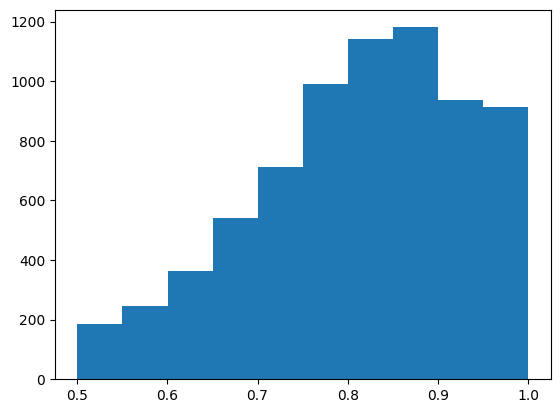

In [194]:
plt.hist(scores)

In [195]:
prediction_sets = []

for pred in test_preds:
    X_i = []
    if pred[1] >= q_hat:
        X_i.append('Positive')
    if pred[0] >= q_hat:
        X_i.append('Negative')
    
    if pred[0] < q_hat and pred[1] < q_hat:
        X_i.append('Positive')
        X_i.append('Negative')
        
    prediction_sets.append(X_i)

In [196]:
# Keep track of the double sets and their indexes 
double_indexes = []
double_labels = []

for idx,p_set in enumerate(prediction_sets):
    if len(p_set) > 1:
        double_indexes.append(idx)
        double_labels.append(y[idx])

IndexError: index 7210 is out of bounds for axis 0 with size 7210

In [197]:
len(double_indexes),sum(double_labels)

(6572, 160)

In [198]:
(2100+134)/7210

0.3098474341192788

##### Performance of the classifier after conformal sorting: 

In [199]:
prediction_sets = np.array(prediction_sets,dtype=object)
labels = np.array(test_labels,dtype=object)

corrected_preds = np.delete(prediction_sets,double_indexes)
corrected_labels = np.delete(labels,double_indexes)

corrected_preds = np.array([0 if x[0] == 'Negative' else 1 for x in corrected_preds])
cm = confusion_matrix(corrected_preds,corrected_labels,0.5)
cm = np.array([[cm['true_negative'],cm['false_positive']],
               [cm['false_negative'],cm['true_positive']]])

prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*prec*recall)/(prec+recall)

s = f'Precission:{prec}\nRecall:{recall}\nF1:{f1}'
print(s)

Precission:0.0
Recall:0.0
F1:nan


/var/folders/_r/jlncy8s12v3dnkjbml325cq00000gn/T/ipykernel_34680/462391394.py:14: RuntimeWarning: invalid value encountered in double_scalars
  f1 = (2*prec*recall)/(prec+recall)


In [200]:
cm

array([[ 12, 587],
       [ 40,   0]])

## Maybe with more ls

# Syn test set 

##### Config x

In [314]:
dirpos = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/3888FinetuneAdam/SynTestPos1.json'
dirneg = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/3888FinetuneAdam/SynTestNeg1.json'

positive,negative = {},{}
# Open the JSON file
with open(dirpos) as file:
    # Load the JSON data as a dictionary
    pos = json.load(file)
    pos = np.array(pos['data'])
    positive['preds'] = pos.ravel() 
    positive['labels'] = [1]*len(pos)
    
with open(dirneg) as file:
    # Load the JSON data as a dictionary
    neg = json.load(file)
    neg = np.array(neg['data'])
    negative['preds'] = neg.ravel()
    negative['labels'] = [0]*len(neg)

In [315]:
pos_frame = pd.DataFrame(positive)
neg_frame = pd.DataFrame(negative)
collected = pd.concat([pos_frame,neg_frame])

In [316]:
collected

,preds,labels
0,0.646523,1
1,0.997275,1
2,0.960028,1
3,0.960577,1
4,0.999851,1
...,...,...
7005,0.992499,0
7006,0.438065,0
7007,0.840505,0
7008,0.993635,0


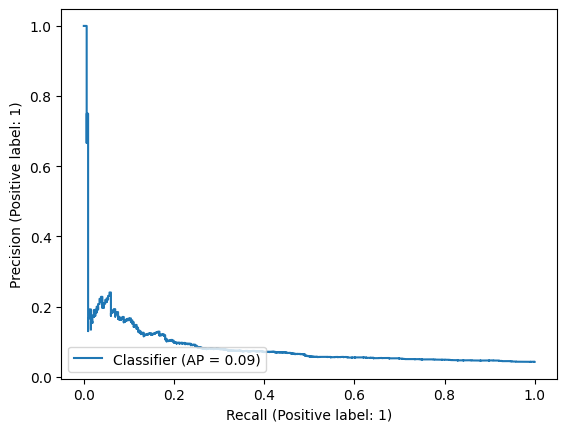

In [317]:
PrecisionRecallDisplay.from_predictions(collected['labels'],collected['preds'])

In [318]:
precision, recall, thresholds= precision_recall_curve(collected['labels'],collected['preds'])

In [319]:
thres,f1 = find_optimal_threshold(precision, recall, thresholds)

In [320]:
f1,thres

(0.14580467675378267, 0.9951421022415161)

In [321]:
cm = confusion_matrix(collected['preds'],collected['labels'],0.9951421022415161)
cm = np.array([[cm['true_negative'],cm['false_positive']],
               [cm['false_negative'],cm['true_positive']]])

In [180]:
collected.groupby('labels').mean()

,preds
labels,
0,0.744860
1,0.812543


In [322]:
prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*prec*recall)/(prec+recall)

In [323]:
s = f'Precission:{prec}\nRecall:{recall}\nF1:{f1}'
print(s)

Precission:0.12895377128953772
Recall:0.16772151898734178
F1:0.14580467675378267


In [324]:
cm

array([[6652,  358],
       [ 263,   53]])

<Axes: xlabel='preds', ylabel='Percent'>

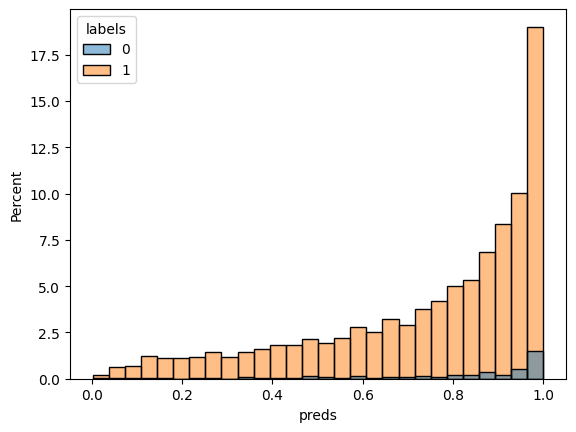

In [159]:
fig,ax = plt.subplots(1,1)
sns.histplot(collected,x = 'preds',hue='labels', stat = 'percent',ax = ax)

In [164]:
collected.labels.sum()

7010

#### N

In [184]:
cm = np.array([[6884,126],
               [48,268]])

prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*prec*recall)/(prec+recall)
s = f'Precission:{prec}\nRecall:{recall}\nF1:{f1}'
print(s)

Precission:0.6802030456852792
Recall:0.8481012658227848
F1:0.7549295774647887


## Q which is fine tuned on synthetic data

In [185]:
cm = np.array([[6936,74],
               [302,14]])

prec = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])
f1 = (2*prec*recall)/(prec+recall)
s = f'Precission:{prec}\nRecall:{recall}\nF1:{f1}'
print(s)

Precission:0.1590909090909091
Recall:0.04430379746835443
F1:0.06930693069306931


# Probabillity distributions

In [310]:
Q_probs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/3888FinetuneAdam/collected.csv')

#A lot of lable smoothing
dirpos = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/MoreLS/TestPos.json'
dirneg = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/MoreLS/TestNeg.json'
ls_probs = get_collected_preds(dirpos,dirneg)

Text(0.5, 1.0, 'Config "x"')

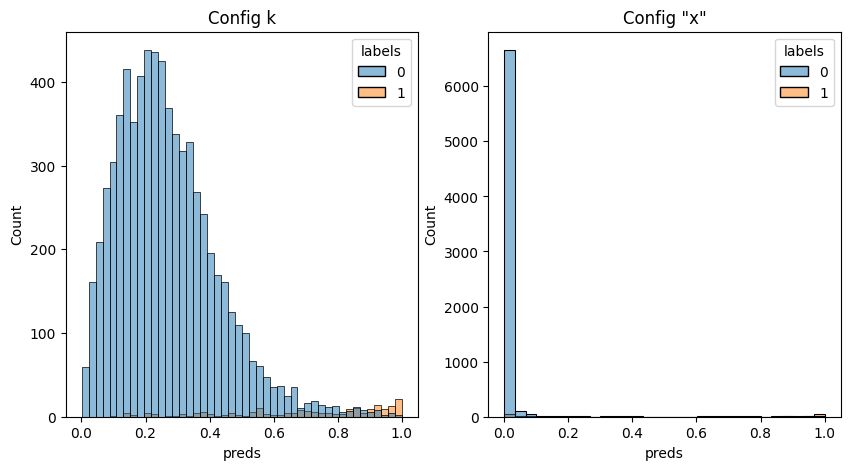

In [311]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=ls_probs,x='preds',hue = 'labels',ax = ax[0])
sns.histplot(data=Q_probs,x='preds',hue = 'labels',bins = 30,ax = ax[1])
ax[0].set_title('Config k')
ax[1].set_title('Config "x"')

<Axes: xlabel='preds', ylabel='Count'>

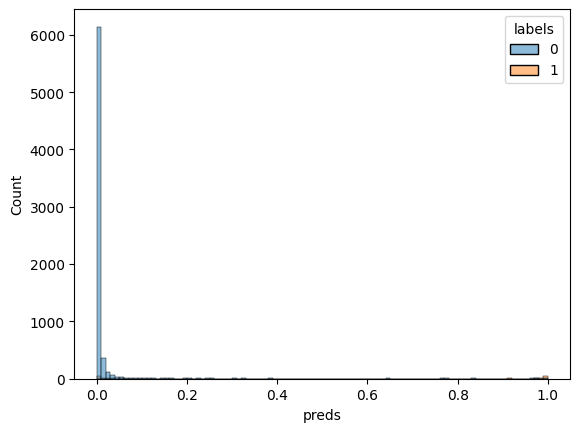

In [19]:
sns.histplot(data=Q_probs,x='preds',hue = 'labels',bins = 100)

In [205]:
df.columns

Index(['Step', 'K - F1 Score', 'K - F1 Score__MIN', 'K - F1 Score__MAX',
       'S - F1 Score', 'S - F1 Score__MIN', 'S - F1 Score__MAX',
       'L - F1 Score', 'L - F1 Score__MIN', 'L - F1 Score__MAX',
       'M - F1 Score', 'M - F1 Score__MIN', 'M - F1 Score__MAX',
       'X - F1 Score', 'X - F1 Score__MIN', 'X - F1 Score__MAX',
       'U - F1 Score', 'U - F1 Score__MIN', 'U - F1 Score__MAX',
       'Q - F1 Score', 'Q - F1 Score__MIN', 'Q - F1 Score__MAX',
       'P - F1 Score', 'P - F1 Score__MIN', 'P - F1 Score__MAX',
       'G - F1 Score', 'G - F1 Score__MIN', 'G - F1 Score__MAX',
       'ECont - F1 Score', 'ECont - F1 Score__MIN', 'ECont - F1 Score__MAX'],
      dtype='object')

In [304]:
p_probs = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18FocalLoss/collected.csv')

#A lot of lable smoothing
dirpos = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18FocalLoss/TestPos.json'
dirneg = '/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/Probabillities/ResNet18FocalLoss/TestNeg.json'
#ls_probs = get_collected_preds(dirpos,dirneg)

In [307]:
p_probs['preds'] = p_probs['preds']

<Axes: xlabel='preds', ylabel='Count'>

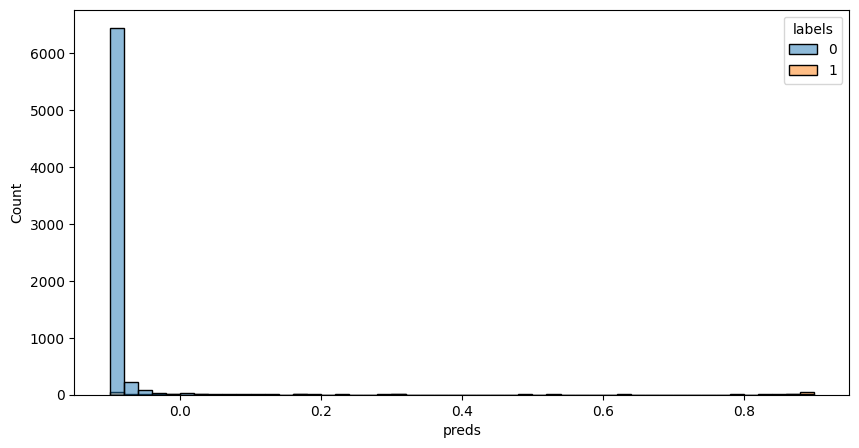

In [309]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data=p_probs,x='preds',hue = 'labels',ax = ax,bins = 50)

## F1-training curves on validation sets 

In [211]:
df.columns

Index(['Step', 'K - F1 Score', 'K - F1 Score__MIN', 'K - F1 Score__MAX',
       'S - F1 Score', 'S - F1 Score__MIN', 'S - F1 Score__MAX',
       'L - F1 Score', 'L - F1 Score__MIN', 'L - F1 Score__MAX',
       'M - F1 Score', 'M - F1 Score__MIN', 'M - F1 Score__MAX',
       'X - F1 Score', 'X - F1 Score__MIN', 'X - F1 Score__MAX',
       'U - F1 Score', 'U - F1 Score__MIN', 'U - F1 Score__MAX',
       'Q - F1 Score', 'Q - F1 Score__MIN', 'Q - F1 Score__MAX',
       'P - F1 Score', 'P - F1 Score__MIN', 'P - F1 Score__MAX',
       'G - F1 Score', 'G - F1 Score__MIN', 'G - F1 Score__MAX',
       'ECont - F1 Score', 'ECont - F1 Score__MIN', 'ECont - F1 Score__MAX'],
      dtype='object')

In [259]:
df = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/WandbData/F1Val.csv')
dfb = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/WandbData/F1B.csv')
dfe =  pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/WandbData/E.csv')
dfh =  pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/WandbData/H.csv')
dfx = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/WandbData/X.csv')

In [262]:
F1 = {}

F1['B'] = dfb['B - F1 Score'].append(dfb['BCont - F1 Score']).reset_index(drop=True).to_numpy()
F1['K'] = df['K - F1 Score'].to_numpy()
F1['P'] = df['P - F1 Score'].to_numpy()
F1['E'] = dfe['E - F1 Score'].append(dfe['ECont - F1 Score']).reset_index(drop=True).to_numpy()
F1['H'] = dfh['H - F1 Score'].to_numpy()
F1['M'] = df['M - F1 Score'].to_numpy()
F1['L'] = df['L - F1 Score'].to_numpy()
F1['P'] = df['P - F1 Score'].to_numpy()
F1['X'] = dfx['X - F1 Score'].to_numpy()

/var/folders/_r/jlncy8s12v3dnkjbml325cq00000gn/T/ipykernel_34680/2960644137.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  F1['B'] = dfb['B - F1 Score'].append(dfb['BCont - F1 Score']).reset_index(drop=True).to_numpy()
/var/folders/_r/jlncy8s12v3dnkjbml325cq00000gn/T/ipykernel_34680/2960644137.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  F1['E'] = dfe['E - F1 Score'].append(dfe['ECont - F1 Score']).reset_index(drop=True).to_numpy()


In [282]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [289]:
colors = { 0: '#1f77b4',
           1: '#ff7f0e',
           2: '#2ca02c',
           3:'#d62728',
           4: '#9467bd',
           5: '#8c564b',
           6: '#e377c2',
           7: '#7f7f7f',
           8: '#bcbd22',
           9: '#17becf'}

Text(0.5, 1.0, 'F1 Validation')

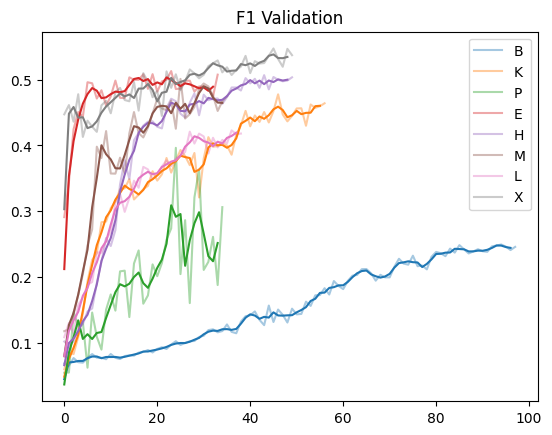

In [296]:
fig,ax = plt.subplots(1,1)
lines = []
c = list(range(len(F1.keys())))
for idx,conf in enumerate(F1.keys()):
    l = F1[conf]
    l = l[~np.isnan(l)]
    ls = smooth(l, 3)[:-1]
    ax.plot(l,alpha = 0.4,c = colors[idx])
    lines.append(line)
ax.legend(list(F1.keys()))

for idx,conf in enumerate(F1.keys()):
    l = F1[conf]
    l = l[~np.isnan(l)]
    ls = smooth(l, 3)[:-1]
    ax.plot(ls,color = colors[idx])

ax.set_title('F1 Validation')

In [278]:
F1['B'].dropna()

AttributeError: 'numpy.ndarray' object has no attribute 'dropna'